### Lab4. House Price Prediction using LR with Regularization 
https://www.dataquest.io/blog/kaggle-getting-started/

### Step1. [Import dataset]. Using Pandas, import “Ames_House_Sales_Cropped.csv” file and print  properties such as head, shape, columns, dtype, info and value_counts. 

In [31]:
import pandas as pd
import csv

In [32]:
house=pd.read_csv("Ames_House_Sales_Cropped.csv")
house

,BldgType,CentralAir,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,1Fam,Y,856.0,854.0,0.0,3,706.0,0.0,1,0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1Fam,Y,1262.0,0.0,0.0,3,978.0,0.0,0,1,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,1Fam,Y,920.0,866.0,0.0,3,486.0,0.0,1,0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,1Fam,Y,961.0,756.0,0.0,3,216.0,0.0,1,0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1Fam,Y,1145.0,1053.0,0.0,4,655.0,0.0,1,0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,1Fam,Y,953.0,694.0,0.0,3,0.0,0.0,0,0,...,6,0.0,0.0,7,953.0,0.0,1999,2000,2007,175000.0
1375,1Fam,Y,2073.0,0.0,0.0,3,790.0,163.0,1,0,...,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010,210000.0
1376,1Fam,Y,1188.0,1152.0,0.0,4,275.0,0.0,0,0,...,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010,266500.0
1377,1Fam,Y,1078.0,0.0,0.0,2,49.0,1029.0,1,0,...,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010,142125.0


In [33]:
house.head()

,BldgType,CentralAir,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,1Fam,Y,856.0,854.0,0.0,3,706.0,0.0,1,0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1Fam,Y,1262.0,0.0,0.0,3,978.0,0.0,0,1,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,1Fam,Y,920.0,866.0,0.0,3,486.0,0.0,1,0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,1Fam,Y,961.0,756.0,0.0,3,216.0,0.0,1,0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1Fam,Y,1145.0,1053.0,0.0,4,655.0,0.0,1,0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0


In [34]:
house.shape

(1379, 39)

In [35]:
df=pd.read_csv("Ames_House_Sales_Cropped.csv")
df

,BldgType,CentralAir,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,1Fam,Y,856.0,854.0,0.0,3,706.0,0.0,1,0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1Fam,Y,1262.0,0.0,0.0,3,978.0,0.0,0,1,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,1Fam,Y,920.0,866.0,0.0,3,486.0,0.0,1,0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,1Fam,Y,961.0,756.0,0.0,3,216.0,0.0,1,0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1Fam,Y,1145.0,1053.0,0.0,4,655.0,0.0,1,0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,1Fam,Y,953.0,694.0,0.0,3,0.0,0.0,0,0,...,6,0.0,0.0,7,953.0,0.0,1999,2000,2007,175000.0
1375,1Fam,Y,2073.0,0.0,0.0,3,790.0,163.0,1,0,...,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010,210000.0
1376,1Fam,Y,1188.0,1152.0,0.0,4,275.0,0.0,0,0,...,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010,266500.0
1377,1Fam,Y,1078.0,0.0,0.0,2,49.0,1029.0,1,0,...,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010,142125.0


In [36]:
d=df.columns
d

Index(['BldgType', 'CentralAir', '1stFlrSF', '2ndFlrSF', '3SsnPorch',
       'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath',
       'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath',
       'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass',
       'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'SalePrice'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BldgType       1379 non-null   object 
 1   CentralAir     1379 non-null   object 
 2   1stFlrSF       1379 non-null   float64
 3   2ndFlrSF       1379 non-null   float64
 4   3SsnPorch      1379 non-null   float64
 5   BedroomAbvGr   1379 non-null   int64  
 6   BsmtFinSF1     1379 non-null   float64
 7   BsmtFinSF2     1379 non-null   float64
 8   BsmtFullBath   1379 non-null   int64  
 9   BsmtHalfBath   1379 non-null   int64  
 10  BsmtUnfSF      1379 non-null   float64
 11  EnclosedPorch  1379 non-null   float64
 12  Fireplaces     1379 non-null   int64  
 13  FullBath       1379 non-null   int64  
 14  GarageArea     1379 non-null   float64
 15  GarageCars     1379 non-null   int64  
 16  GarageYrBlt    1379 non-null   float64
 17  GrLivArea      1379 non-null   float64
 18  HalfBath

In [38]:
df.dtypes

BldgType          object
CentralAir        object
1stFlrSF         float64
2ndFlrSF         float64
3SsnPorch        float64
BedroomAbvGr       int64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFullBath       int64
BsmtHalfBath       int64
BsmtUnfSF        float64
EnclosedPorch    float64
Fireplaces         int64
FullBath           int64
GarageArea       float64
GarageCars         int64
GarageYrBlt      float64
GrLivArea        float64
HalfBath           int64
KitchenAbvGr       int64
LotArea          float64
LotFrontage      float64
LowQualFinSF     float64
MSSubClass         int64
MasVnrArea       float64
MiscVal          float64
MoSold             int64
OpenPorchSF      float64
OverallCond        int64
OverallQual        int64
PoolArea         float64
ScreenPorch      float64
TotRmsAbvGrd       int64
TotalBsmtSF      float64
WoodDeckSF       float64
YearBuilt          int64
YearRemodAdd       int64
YrSold             int64
SalePrice        float64
dtype: object

In [39]:
df.dtypes.value_counts()

float64    21
int64      16
object      2
dtype: int64

### Step2. [Predict Sale Price without Categorical features]. 
#### Drop both categorical features – BldgType and CentralAir (USE drop() and pop() methods)

In [40]:
house.drop(['BldgType'],axis=1)  ###drop() method

,CentralAir,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,Y,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,Y,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,Y,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,Y,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,Y,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,Y,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,...,6,0.0,0.0,7,953.0,0.0,1999,2000,2007,175000.0
1375,Y,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,...,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010,210000.0
1376,Y,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,...,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010,266500.0
1377,Y,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,...,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010,142125.0


In [41]:
df.pop('CentralAir')

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1374    Y
1375    Y
1376    Y
1377    Y
1378    Y
Name: CentralAir, Length: 1379, dtype: object

#### Prepare X matrix (36 feature columns) and y vector (ie., SalePrice column) 

In [42]:
data1 = ['1stFlrSF', '2ndFlrSF', '3SsnPorch','BedroomAbvGr','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath','BsmtUnfSF','EnclosedPorch','Fireplaces','FullBath','GarageArea','GarageCars','GarageYrBlt', 'GrLivArea','HalfBath','KitchenAbvGr','LotArea','LotFrontage','LowQualFinSF','MSSubClass','MasVnrArea','MiscVal', 'MoSold','OpenPorchSF','OverallCond','OverallQual','PoolArea','ScreenPorch','TotRmsAbvGrd','TotalBsmtSF','WoodDeckSF','YearBuilt','YearRemodAdd','YrSold']
X=house[data1]
data2 = ['SalePrice']
y=house.SalePrice

In [43]:
X

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,5,7,0.0,0.0,8,856.0,0.0,2003,2003,2008
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,8,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,5,7,0.0,0.0,6,920.0,0.0,2001,2002,2008
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,5,7,0.0,0.0,7,756.0,0.0,1915,1970,2006
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,5,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,5,6,0.0,0.0,7,953.0,0.0,1999,2000,2007
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,9,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,6,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010


In [44]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1374    175000.0
1375    210000.0
1376    266500.0
1377    142125.0
1378    147500.0
Name: SalePrice, Length: 1379, dtype: float64

####  Split dataset for training and testing as X_train, X_test, y_train, y_test (use 25% test size). 

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,test_size=0.25)

In [47]:
X_train, X_test, y_train, y_test

(      1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
 903      979.0     979.0        0.0             4       484.0         0.0   
 582     1482.0     780.0        0.0             4       871.0         0.0   
 151     1149.0     467.0        0.0             3       370.0         0.0   
 523     1092.0       0.0        0.0             2       895.0         0.0   
 940     1050.0       0.0        0.0             3       915.0         0.0   
 ...        ...       ...        ...           ...         ...         ...   
 833      808.0     785.0        0.0             3         0.0         0.0   
 982     1306.0       0.0        0.0             1       900.0         0.0   
 1096    1640.0       0.0      216.0             3       728.0         0.0   
 884     2069.0       0.0        0.0             4       425.0         0.0   
 1091    1265.0       0.0       96.0             3       633.0         0.0   
 
       BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  .

####  Create LinearRegression model, fit on training set and predict on test set 

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
#create a linear regression object
model = LinearRegression()
#train a model
model.fit( X_train,y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)
y_pred

array([343843.65754748,  95029.38549773, 169794.24889062, 211304.43611183,
       210398.63861163,  75073.75727441, 111613.78843825, 144962.28248309,
       178539.06759803, 113796.00153267,  91671.80644439, 112023.44969957,
       106306.57435984, 222129.07385228, 174818.66894032, 108839.68591425,
       180008.73409479, 136905.97584528, 101504.92408718, 141319.2703993 ,
       169394.68535725, 141770.09535832,  49816.7114211 , 209753.53862673,
       220739.27697146, 102349.50412943, 100955.66549767,  88788.24616048,
       179979.31978142, 229207.93369507, 241499.59810583, 188573.8133879 ,
       138375.20136656, 112016.38806082, 198329.03194489, 213189.51413244,
       231224.16110581, 154516.5968845 , 128722.31576005, 151342.18758167,
       173073.15762992, 194854.4806387 , 283405.38148664, 117922.26895843,
        73247.28522753, 112162.98929892, 170780.47241076, 324588.27230496,
       240759.96079044, 376707.91509053, 265351.68182457,  52797.83793952,
       207565.38162927, 1

#### Compute Mean Squared Error (MSE) on actual values and predicted values (you will get output  as 1474827326.0).

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
mse=mean_squared_error(y_test,y_pred)
mse

1127595525.476533

### Step3. [Create Scatter Plot]. Plot Scatterplot between y_test and y_pred. 

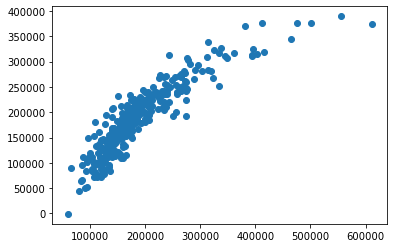

In [53]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

### Step4. [Encode Categorical columns]. Using get_dummies() method, perform one hot encoding on the  two categorical columns, BldgType and CentralAir. Now, you will get 5 columns for BldgType variable  and 2 columns for CentralAir column. So, now you have 43 independent variables and 1 dependent  variable. 

In [62]:
house=pd.read_csv("Ames_House_Sales_Cropped.csv")
house

,BldgType,CentralAir,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,1Fam,Y,856.0,854.0,0.0,3,706.0,0.0,1,0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1Fam,Y,1262.0,0.0,0.0,3,978.0,0.0,0,1,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,1Fam,Y,920.0,866.0,0.0,3,486.0,0.0,1,0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,1Fam,Y,961.0,756.0,0.0,3,216.0,0.0,1,0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1Fam,Y,1145.0,1053.0,0.0,4,655.0,0.0,1,0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,1Fam,Y,953.0,694.0,0.0,3,0.0,0.0,0,0,...,6,0.0,0.0,7,953.0,0.0,1999,2000,2007,175000.0
1375,1Fam,Y,2073.0,0.0,0.0,3,790.0,163.0,1,0,...,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010,210000.0
1376,1Fam,Y,1188.0,1152.0,0.0,4,275.0,0.0,0,0,...,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010,266500.0
1377,1Fam,Y,1078.0,0.0,0.0,2,49.0,1029.0,1,0,...,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010,142125.0


In [63]:
encode_house=pd.get_dummies(house, columns=["CentralAir","BldgType"])
encode_house.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,YearRemodAdd,YrSold,SalePrice,CentralAir_N,CentralAir_Y,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,2003,2008,208500.0,0,1,1,0,0,0,0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,1976,2007,181500.0,0,1,1,0,0,0,0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,2002,2008,223500.0,0,1,1,0,0,0,0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,1970,2006,140000.0,0,1,1,0,0,0,0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,2000,2008,250000.0,0,1,1,0,0,0,0


In [64]:
encode_house.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold', 'SalePrice', 'CentralAir_N', 'CentralAir_Y',
       'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE'],
      dtype='object')

In [65]:
encode_house.shape

(1379, 44)

### Step5. [Predict Sale Price with Categorical features] 
#### Prepare X matrix (43 feature columns) and y vector (ie., SalePrice column) 

In [75]:
data3 = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold', 'CentralAir_N', 'CentralAir_Y',
       'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE']
encode_X=house[data1]
data4 = ['SalePrice']
encode_y=house.SalePrice

In [76]:
encode_X

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,5,7,0.0,0.0,8,856.0,0.0,2003,2003,2008
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,8,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,5,7,0.0,0.0,6,920.0,0.0,2001,2002,2008
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,5,7,0.0,0.0,7,756.0,0.0,1915,1970,2006
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,5,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,5,6,0.0,0.0,7,953.0,0.0,1999,2000,2007
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,9,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,6,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010


In [77]:
encode_y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1374    175000.0
1375    210000.0
1376    266500.0
1377    142125.0
1378    147500.0
Name: SalePrice, Length: 1379, dtype: float64

####  Split dataset for training and testing 

In [78]:
encode_X_train, encode_X_test, encode_y_train, encode_y_test = train_test_split(encode_X, encode_y, train_size=0.75,test_size=0.25)
encode_X_train, encode_X_test, encode_y_train, encode_y_test

(     1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
 223     798.0     689.0        0.0             3        94.0         0.0   
 673    1178.0       0.0        0.0             3      1084.0         0.0   
 718    1494.0       0.0        0.0             2       437.0      1057.0   
 136     875.0       0.0        0.0             2       209.0         0.0   
 684    1776.0       0.0        0.0             4         0.0         0.0   
 ..        ...       ...        ...           ...         ...         ...   
 965    1504.0       0.0        0.0             2        16.0         0.0   
 482    1368.0       0.0        0.0             2         0.0         0.0   
 562    1402.0       0.0        0.0             2         0.0         0.0   
 581    1828.0       0.0        0.0             3        48.0         0.0   
 949     985.0       0.0        0.0             3       595.0         0.0   
 
      BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  OverallCo

#### Create LinearRegression model, fit on training set and predict on test set 

In [79]:
#create a linear regression object
model3 = LinearRegression()
#train a model
model3.fit( encode_X_train,encode_y_train)

LinearRegression()

In [80]:
encode_y_pred3 = model3.predict(encode_X_test)
encode_y_pred3

array([263011.17348096, 151278.69406732, 237521.15280445, 306444.83659023,
       179589.12045248, 115295.24967863, 203596.65767938, 176617.38472468,
       268631.19291751, 182056.65942805, 280772.96016023, 107016.90710112,
       116173.93325518, 120909.63455584, 165041.44922353, 176959.05623095,
       168691.0385779 , 297130.05957958, 211041.07273794, 229225.62046386,
       204372.74722721, 125472.33582051, 210250.28184771, 128133.06143696,
       160466.20410665, 143316.83598233, 113662.70546705, 128384.85053326,
       204005.67809678, 254170.40185392, 111373.05179766, 117721.75287262,
        89979.83990709,  53289.42641272, 227546.2766431 , 174599.88447911,
       363855.5618764 , 112180.99083582, 174408.02921482, 320263.70850029,
       170015.30933011, 226691.10446723, 121966.20214686, 145222.19936231,
       172222.59936543,  90329.90726443, 134316.70375444, 134398.98814105,
       170693.92853795, 295137.06691152, 192412.42730159, 202648.90969701,
       114478.17984398,  

#### Compute Mean Squared Error on actual values and predicted values (you will get output as 1461036570.0).


In [82]:
mse1=mean_squared_error(encode_y_test,encode_y_pred3)
mse1

840762442.6361699

### Step6. [Normalize using StandardScaler and Predict Sale Price] 
#### Using StandardScaler, perform fit_transform() on X_train and transform() on X_test matrix that  you already splitted. 

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()
ss3=scaler.fit_transform(encode_X_train)   # scale X_train using fit_transform() method 
print(ss3)

[[-0.97719621  0.76025618 -0.13151388 ... -0.96495393 -1.72036703
   1.68452317]
 [-0.01783362 -0.79993851 -0.13151388 ...  0.00341162  0.72527132
   0.16130764]
 [ 0.77995212 -0.79993851 -0.13151388 ...  0.76427027  0.52962025
  -1.36190789]
 ...
 [ 0.54768539 -0.79993851 -0.13151388 ...  1.1446996   1.06766068
  -0.60030012]
 [ 1.62318135 -0.79993851 -0.13151388 ...  1.17928408  1.06766068
  -0.60030012]
 [-0.50508883 -0.79993851 -0.13151388 ...  0.14174956 -0.39972232
   0.16130764]]


In [85]:
ss5=scaler.transform(encode_X_test)     #X_test using transform() method
print(ss5)

[[ 0.59060424 -0.79993851 -0.13151388 ...  1.17928408  1.06766068
  -0.60030012]
 [-0.36623372 -0.79993851 -0.13151388 ...  0.79885476  0.52962025
   0.9229154 ]
 [-0.02540753  1.02745933  5.70578985 ...  0.55676337  0.18723088
  -0.60030012]
 ...
 [-0.85348893  1.69320278 -0.13151388 ...  1.07553063  0.96983515
  -1.36190789]
 [-0.52023666 -0.29270541 -0.13151388 ... -0.79203151 -1.72036703
   0.9229154 ]
 [-0.56820479 -0.79993851 -0.13151388 ... -1.82956604 -1.72036703
  -0.60030012]]


#### Create a new Linear Regression model, fit on scaled X_train and y_train and predict on scaled X_test. 

In [90]:
#create a linear regression object
model4 = LinearRegression()
#train a model
model4.fit(ss3,encode_y_train)

LinearRegression()

In [91]:
s_y_pred = model4.predict(encode_X_test)
s_y_pred

array([9.16641201e+07, 1.01960588e+08, 1.17921652e+08, 1.18784635e+08,
       8.13404241e+07, 8.94732382e+07, 9.40521718e+07, 8.47305101e+07,
       1.11879748e+08, 6.47857271e+07, 1.39809605e+08, 8.72764978e+07,
       9.85254414e+07, 7.72023423e+07, 9.66862338e+07, 1.11663252e+08,
       9.90062546e+07, 1.29149393e+08, 1.53985324e+08, 1.13938057e+08,
       9.44874523e+07, 8.04543375e+07, 9.55535295e+07, 1.12715683e+08,
       8.45654831e+07, 9.46792646e+07, 9.30213017e+07, 9.51049792e+07,
       1.00308638e+08, 1.01110706e+08, 8.46569143e+07, 7.87684559e+07,
       9.51238547e+07, 8.44224001e+07, 9.64064389e+07, 7.14143473e+07,
       2.99870872e+08, 9.00930628e+07, 7.98589158e+07, 1.23314146e+08,
       9.47740853e+07, 1.36703065e+08, 8.92381830e+07, 8.29015280e+07,
       6.47684408e+07, 7.28783855e+07, 8.35825411e+07, 9.62460522e+07,
       1.56130989e+08, 1.30085628e+08, 9.41808575e+07, 1.37399172e+08,
       9.56875697e+07, 6.71284621e+07, 1.39568890e+08, 7.19868076e+07,
      

#### Compute Mean Squared Error (MSE) on actual values and predicted values (you will get output as 1461036570.0).

In [92]:
s_mse=mean_squared_error(encode_y_test,s_y_pred)
s_mse

1.3194590569635376e+16

### Step7. [Normalize using MinMaxScaler and Predict Sale Price] 
#### Repeat Step6 using MinMaxScaler

In [93]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

In [94]:
mm_ss = mm_scaler.fit_transform(encode_X_train)
mm_ss

array([[0.08462623, 0.33365617, 0.        , ..., 0.50387597, 0.        ,
        1.        ],
       [0.17395393, 0.        , 0.        , ..., 0.72093023, 0.83333333,
        0.5       ],
       [0.24823695, 0.        , 0.        , ..., 0.89147287, 0.76666667,
        0.        ],
       ...,
       [0.22661025, 0.        , 0.        , ..., 0.97674419, 0.95      ,
        0.25      ],
       [0.32675129, 0.        , 0.        , ..., 0.98449612, 0.95      ,
        0.25      ],
       [0.12858486, 0.        , 0.        , ..., 0.75193798, 0.45      ,
        0.5       ]])

In [95]:
mm_ss5 = mm_scaler.transform(X_test)
mm_ss5

array([[0.12858486, 0.        , 0.        , ..., 0.75193798, 0.45      ,
        0.5       ],
       [0.37141514, 0.        , 0.        , ..., 0.99224806, 0.98333333,
        1.        ],
       [0.1274095 , 0.        , 0.        , ..., 0.75193798, 0.45      ,
        0.75      ],
       ...,
       [0.20122238, 0.        , 0.        , ..., 0.97674419, 0.93333333,
        0.        ],
       [0.14621533, 0.        , 0.        , ..., 0.68217054, 0.85      ,
        1.        ],
       [0.07898449, 0.31767554, 0.        , ..., 0.93023256, 0.83333333,
        0.25      ]])

In [96]:
model5 =LinearRegression()
model5.fit(mm_ss,encode_y_train)

LinearRegression()

In [97]:
mm_y_pred = model5.predict(mm_ss5)
mm_y_pred

array([131797.95467908, 311704.86657981, 139200.22539657, 313443.20643999,
       252797.86648437, 123046.91784846, 117378.5017364 , 222172.6976128 ,
       225919.4630138 , 180879.68083942, 173522.13201178, 147080.98290307,
       204272.18383693, 100657.93059886,  97695.61667541, 191181.57760294,
       308238.9550052 , 132857.42712151, 141577.62792228, 113675.08061916,
       133983.75273388, 106062.11127522, 235032.39810745, 125903.62241075,
       189230.78678897, 199644.5909249 , 184328.28307383, 147043.47428562,
       204828.93843517, 191484.14923426, 114409.9774009 , 171845.43746774,
       176599.78087299, 204242.60775792, 250560.48788192, 216913.12810681,
       232734.08171018, 211273.28920557, 205569.63752126, 167472.87343678,
        58478.58513446, 113005.21841861, 157012.7838008 , 265221.32286705,
       168950.64885348, 152213.169075  , 167451.55099716, 328199.39199748,
       182010.58031063, 203642.03567921, 147973.13197864,  96325.89094823,
       227570.84723723,  

#### Mean Squared Error will be: 1461036570.0

In [98]:
mse_mm=mean_squared_error(encode_y_test,mm_y_pred)
mse_mm

9404508368.107819

### Step8. [Predict using SGD Regressor] 
#### Use scaled X_train and X_test using StandardScaler that you computed before 

In [99]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

#### Create SGDRegressor, fit and predict 

In [100]:
seg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
seg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [101]:
re_y_pred = seg.predict(X)
re_y_pred

array([228671.31817897, 200777.00895064, 222178.96664092, ...,
       229832.92538152, 128254.43107227, 155640.32874484])

#### Compute MSE on y_test and y_pred this time. You will get output as 1592430104.0

In [103]:
mse_seg=mean_squared_error(y,re_y_pred)
mse_seg

1207136617.6570287

### Step8. [Predict using Ridge Regression] 

#### Create RidgeCV, fit and predict 

In [118]:
from sklearn.linear_model import Ridge

In [119]:
RidgeCV = Ridge(alpha=1.0)
RidgeCV.fit(ss3,encode_y_train)
rid_y_pred = RidgeCV.predict(ss3)
rid_y_pred

array([129474.25435239, 154299.40507943, 226646.37404798, ...,
       213069.56190215, 319814.40859995, 131879.06092969])

#### Compute MSE on y_test and y_pred this time. You will get output as 1442196000.3367693. 

In [120]:
mse_rid=mean_squared_error(encode_y_train,rid_y_pred)
mse_rid

1316556019.1346939

### Step8. [Predict using Lasso Regression] 

In [121]:
from sklearn.linear_model import Lasso

#### Create LassoCV, fit and predict

In [122]:
LasCV = Lasso(alpha=1.0)
LasCV.fit(ss3,encode_y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 305643652788.40485, tolerance: 675327095.0964903
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [123]:
las_y_pred = LasCV.predict(ss3)
las_y_pred

array([129497.73854696, 154226.11412444, 226690.0456038 , ...,
       213090.74498072, 319851.56030583, 131789.02164197])

#### Compute MSE on y_test and y_pred this time. You will get output as 1409368613.5329669

In [124]:
mse_las=mean_squared_error(encode_y_train,las_y_pred)
mse_las

1316552641.500684

### Step9.[RMSE]. Print Root Mean Squared Error values (use numpy.sqrt() method) as below and compare error values. 
#### RMSE without one hot encoding: 38403.0 
#### RMSE with One hot encoding: 38224.0 
#### RMSE with OHE and Standard Scaling: 38224.0 
#### RMSE with OHE and MinMax Scaling: 38224.0 
#### RMSE of SGDRegressor with OHE and Standard Scaler: 38528.0 
#### RMSE of RidgeCV with OHE and Standard Scaler: 37976.0 
#### RMSE of LassoCV with OHE and Standard Scaler: 37542.0 

In [125]:
from math import sqrt

In [126]:
print("RMSE without one hot encoding:  ",sqrt(mse))
print("RMSE with one hot encoding:  ",sqrt(mse1))
print("RMSE with one and Standard Scaling:  ",sqrt(s_mse))
print("RMSE with one and MinMax Scaling:  ",sqrt(mse_mm))
print("RMSE of SGDRegressor with one and Standard Scaler:  ",sqrt(mse_seg))
print("RMSE of RigdCV with one and Standard Scaler:  ",sqrt(mse_rid))
print("RMSE of LassoCV with one and Standard Scaler:  ",sqrt(mse_las))

RMSE without one hot encoding:   33579.689180761234
RMSE with one hot encoding:   28995.903894104937
RMSE with one and Standard Scaling:   114867708.99445751
RMSE with one and MinMax Scaling:   96976.8444944865
RMSE of SGDRegressor with one and Standard Scaler:   34743.87165612129
RMSE of RigdCV with one and Standard Scaler:   36284.37706692363
RMSE of LassoCV with one and Standard Scaler:   36284.3305229776
